# Assignment 2 - Clustering
```
James Ambat
Assignment 2
CS-663
```

## My Setup
From the terminal, create and activate the virtual environment:
```
cd kmeans-jaambat
mkdir venv
python3 -m venv ./venv
source venv/bin/activate
```

I used PyCharm IDE for development and linked the interpreter with the following steps:
```
PyCharm -> Settings -> Project: kmeans-jaambat
Python Interpretter -> Add Interpretter
Add Local Interpretter -> /kmeans-jaambat/venv
```

From the terminal, install the required libraries:
```
cd kmeans-jaambat
pip install -r requirements.txt
```

# Part 1 - Implement K-Means
Create a python-based implementation of the K-Means algorithm.
* See my implementation of KMeans in `KMeans.py` and `Part 1 Calculations`
  * My implementation selects random centroid points that are dispersed by at least `0.65 standard deviations` away from each other in all dimensions so that there are no "overlapping" domains from centroids spaced too closely together.
  * I also implement optional params to narrow down a reasonable range of x and y coordinates so that points are not scattered too far away.
  * The aforementioned design implementations ensured clusters could be generated for the selected amount of clusters as compared to `make_blobs()`.
* Before implementing Part 2, I tested my implementation to verify performance in `Part 1 Calculations` with a unit test of (4) points.
  * The test uses (4) 2-dimensional points and k centroids that are randomly initialized
  * Distances to centroids are iteratively calculated for a `max_iterations` number of times.
  * The points are plotted using `plot_clustered_instances()` method to visualize the clustering.

## Part 1 Calculations

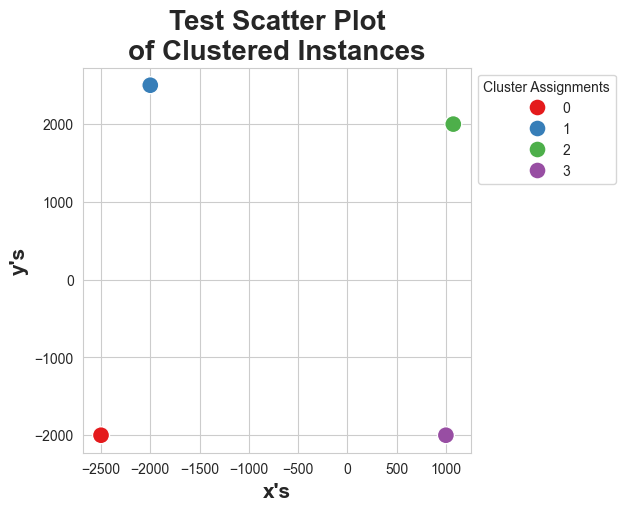

In [1]:
import matplotlib.pyplot as plt
import numpy
import pandas as pd

# Part 1 - Implement K means
from KMeans import KMeans
k_means = KMeans(k=4, max_iterations=100)

# A list of test instances in 2-Dimensions
x_test = [[-2500, -2000], [-2000, 2500], [1000, -2000], [1075, 2000]]

# Test the implementations and plot the results.

# Since randomly selected centroids may produce a centroid that's too far away, perform a kmeans until a randomly selected set of
# centroids produces 4 clusters.
closest_centroids, centroid_coordinates = k_means.fit(x=x_test,
                                                      x_range=(-100, 100),
                                                      y_range=(-100, 100))

k_means.plot_clustered_instances(instances=x_test,
                                 closest_centroids=closest_centroids,
                                 scatter_plot_dot_size=150,
                                 scatter_plot_title="Test Scatter Plot\nof Clustered Instances",
                                 compare_against_make_blob=False)

# Part 2 Performance Comparison
Do a performance comparison among expected labels using the implementation of K-Means and Scikit-Learn's library.
  2.1 - Use `x` as the parameter as input to the `fit()` function from **KMeans**, and use `cluster_assignments` to determine whether your implementation’s hypotheses are correct.
  2.2 - Use `x` as the parameter as input to KMeans as implemented in **scikit-learn**, and use `cluster_assignments` to determine whether that implementation’s hypotheses are correct.
  2.3 - Report two comparisons: one for your implementation’s hypotheses against the expected values in cluster_assignments; another for your implementation’s hypotheses against the hypotheses generated by scikit-learn.

# Part 2.1
When comparing my implementation's hypotheses, to the `make_blob` cluster assignment's the hypotheses appear to be correct.
* To accomplish this, I made sure my randomly selected centroids were evenly dispersed and that ranges for x's and y's could be selected so that reasonable ranges of starting points + a good dispersion of random points could cast centroid that could converge on clusters.

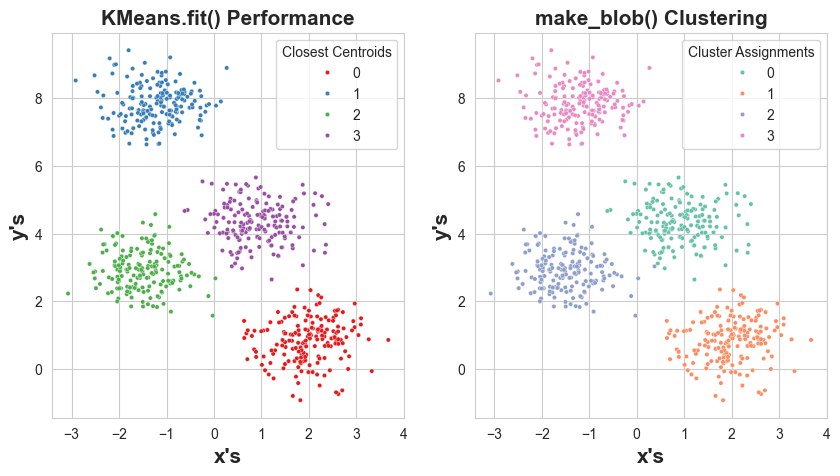

In [2]:
# Part 2.1 Calculations
from sklearn.datasets import make_blobs

# Generate instances of data points in 2D space.
x, cluster_assignments = make_blobs(n_samples=700, centers=4, cluster_std=0.60, random_state=0)

# Use implementation of KMeans.fit()
k_means = KMeans(k=4, max_iterations=200)
closest_centroids, _ = k_means.fit(x=x, x_range=(-3, 3), y_range=(0, 8))

k_means.plot_clustered_instances(instances=x,
                                 closest_centroids=closest_centroids,
                                 scatter_plot_dot_size=10,
                                 scatter_plot_title="My K-Means Performance",
                                 compare_against_make_blob=True,
                                 make_blobs_cluster_assignments=cluster_assignments)



# Part 2.2
When using **scikit-learn's** implementation, its hypotheses as compared to `make_blob()'s` cluster_assignments appears to be a little different from `make_blob()'s` clustering assignments.
* The **scikit-learn** Kmeans implementation bisects two of the middle clusters into separate groupings in a horizontal manner.
* My implementation of the `KMeans.fit()` and the `make_blob()` cluster grouping seem to cluster the groups consistently between each other.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


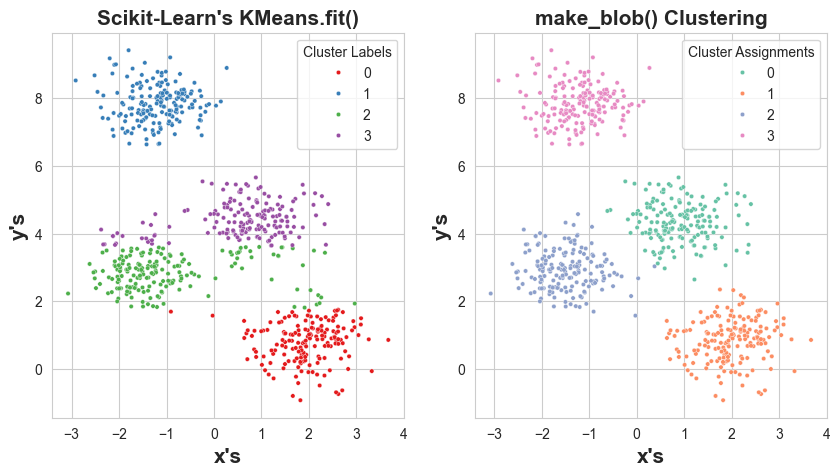

In [10]:
# Part 2.2 Calculations
from sklearn.cluster import KMeans
import seaborn as sns
import numpy as np

k_means = KMeans(n_clusters=4, max_iter=200, tol=0.0001)

x_data_frame = pd.DataFrame(x)
x_data_frame.columns =["x", "y"]
k_means.fit(X=x_data_frame.iloc[:,1:])

# Get the labels of the cluster assignment from scikit-learn's Kmeans
cluster_labels = k_means.labels_

# Put the labels into the x_data_frame
x_data_frame["Cluster Labels"] = cluster_labels

# Plot the x_data_frame alongside the make_blob()'s cluster assignment
figures, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Plot the x_data_frame on the first axis
sns.scatterplot(data=x_data_frame, x="x", y="y", s=10, hue="Cluster Labels", palette="Set1", ax=axes[0])
axes[0].set_title("Scikit-Learn's KMeans.fit()", fontweight="bold", fontsize=15)
axes[0].set_xlabel("x's", fontweight="bold", fontsize=15)
axes[0].set_ylabel("y's", fontweight="bold", fontsize=15)
plt.legend(title="Cluster Labels")

# Plot the make_blob's cluster assignments in axis 2
if type(cluster_assignments) is numpy.ndarray:
    cluster_assignments = cluster_assignments.tolist()

x_data_frame["make_blob() Cluster Assignments"] = cluster_assignments
sns.scatterplot(data=x_data_frame, x="x", y="y", s=10, hue="make_blob() Cluster Assignments", palette="Set2", ax=axes[1])
axes[1].set_title("make_blob() Clustering", fontweight="bold", fontsize=15)
axes[1].set_xlabel("x's", fontweight="bold", fontsize=15)
axes[1].set_ylabel("y's", fontweight="bold", fontsize=15)
plt.legend(title="Cluster Assignments")

plt.show()

# Part 2.3
See the reported findings and scatter plots in `Part 2.1` and `Part 2.2`.